# MineCraft Project - Kristen Chan

# Introduction

Video games have become a significant aspect in many people's lives, offering entertainment and social connection to players of various ages. These companies that are producing video games can collect valuable information on understanding their players' behaviour to improve their experience. Analyzing factors that influence game-related newsletter subscription can allow for these companies to enhance user engagement and recruitment. This leads to the question: **Can a player's age and a player's experience level predict newsletter subscription to the game?** 

A specific video game, MineCraft, is a blocky sandbox game that was developed in 2011 and gained popularity among various players. Through this game, players can explore, craft, fight, and interact with players and creatures in the "Overworld", made completely full of blocks (MineCraft, 2025). This video game features open-ended gameplay with no fixed objectives, so every player can have their own unique experience with freedom to be in either creative or survival mode. Minecraft is a great platform to study both player behavior and engagement within the game. 

In the Computer Science department at the University of British Columbia, a research group led by Frank Wood has collected data on how people play video games through a MineCraft server. Each player's actions were recorded when they navigated the game, which ultimately formed the dataset that tracks user engagement and personal information. The dataset that the research group has collected will be used to analyze player behaviour and information to determine whether or not one has subscribed to the newsletter.  

### Dataset Description
* Number of Observations: 196
* Number of Variables: 7
* Data Source: The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood
* Summary of the Dataset: This data is used to determine user engagement across Minecraft by collecting personal information of each individual player to perform further analysis.  

| Column Name |Data Type | Description|Possible Value/Range| 
|-----------|-------|-------------|-------------|
|  experience| character (chr)  |Player’s level of experience with the game |Beginner, Veteran, Regular,Amateur,Pro |
| subscribe |Logical value (lgl) | Player’s subscription status to the game |TRUE, FALSE  |
|hashedEmail  |character (chr) |Player’s email(hashed for privacy)|N/A |
|played_hours |numeric (dbl) |Total amount of hours players's spent playing in the game |N/A |
|name |character (chr) |Player’s name |N/A|
|gender|character (chr)  | Player’s gender|Agender,Male, Female, Non-binary, Two-spirited, Prefer not to Say, Other |
|Age| numeric (dbl) | Player’s Age | N/A|

*Some columns will not be used in the analysis including hashedEmail, name, played_hours, gender*


## Data Analysis

In [116]:
library(tidyverse)
library(tidymodels)
library(lubridate)
library(repr)
library(readr)
library(recipes)
options(repr.matrix.max.rows = 6)

Loading the necessary packages to perform data analysis. 

In [117]:
players <- read_csv("players.csv")
players

players <- players |>
    select(experience, subscribe, Age)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


experience,subscribe,Age
<chr>,<lgl>,<dbl>
Pro,TRUE,9
Veteran,TRUE,17
Veteran,FALSE,17
⋮,⋮,⋮
Amateur,FALSE,17
Amateur,FALSE,17
Pro,TRUE,NA


This is to read the dataset and select the specific columns that will be used within this dataset. 

# Methods and Results

To answer the above research questions, to predict if player age and level of player's experience can determine whether or not a player subscribes to a game related newsletter, K-nearest neighbor classification will be used. 

## Data Wrangling

In [120]:
players <- players |> 
    select(experience, Age, subscribe) |>
    mutate(experience=as_factor(experience), subscribe=as_factor(subscribe)) |>
    mutate(Age = if_else(is.na(Age), mean(Age, na.rm = TRUE), Age))|>
    mutate(
    experience_numeric = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur"  ~ 2,
      experience == "Regular"  ~ 3,
      experience == "Pro"      ~ 4,
      experience == "Veteran"  ~ 5,
      TRUE ~ NA_real_))

players

experience,Age,subscribe,experience_numeric
<fct>,<dbl>,<fct>,<dbl>
Pro,9,TRUE,4
Veteran,17,TRUE,5
Veteran,17,FALSE,5
⋮,⋮,⋮,⋮
Amateur,17.00000,FALSE,2
Amateur,17.00000,FALSE,2
Pro,20.52062,TRUE,4


This first step in my data analysis is to read the dataset through the read_csv() function. After performing that step, the data was cleaned and wrangled by choosing the columns needed in the data analysis through the select() function which included experience, Age, and subscribe. Moreover, the categorical predictors were converted into factors, so that they become numerical predictors. However, for the "experience" column, it was changed to numerical values by ordering it from 1-5 from "Beginner < Amateur < Regular < Pro < Veteran". This step is crucial so that there are numerical inputs in the dataset. Furthermore, missing age values was replaced with the mean age value because it would eliminate the NA values shown in the dataset which could have caused the KNN classification to not work properly. 





## Prelimiary Visualization

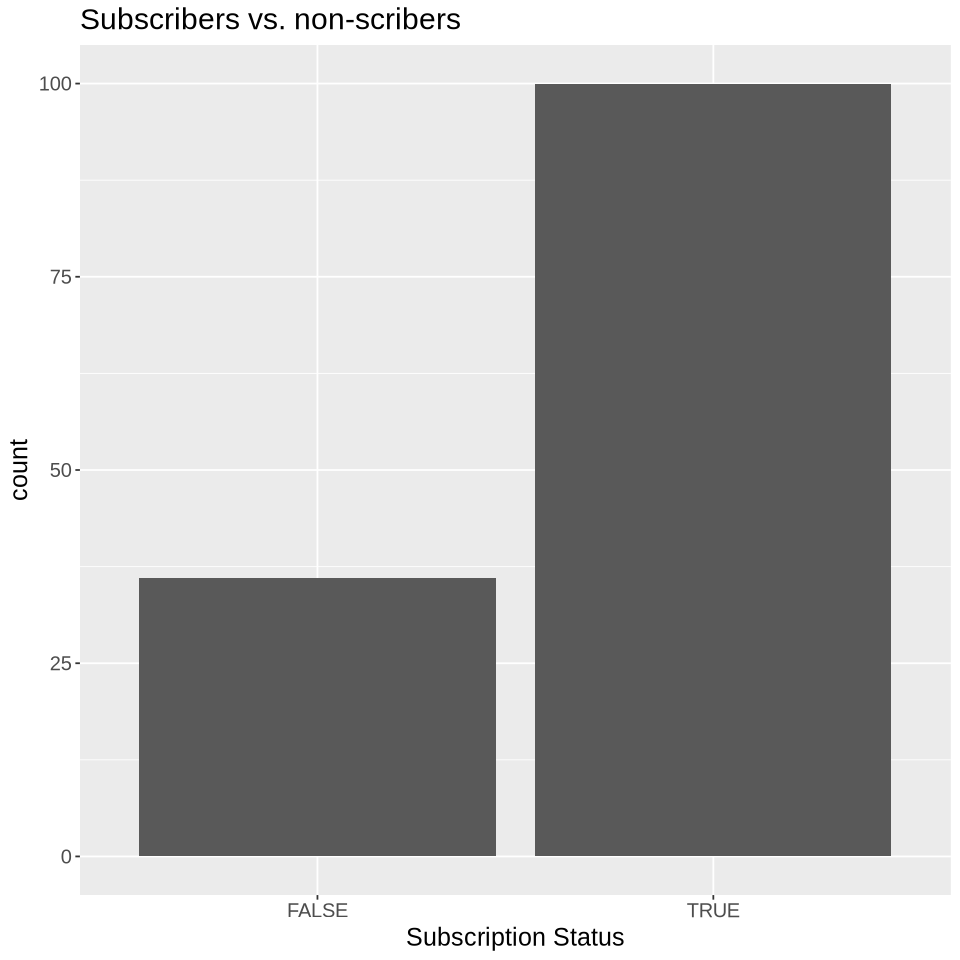

In [135]:
options(repr.plot.width = 8, repr.plot.height = 8)
players_project <- players_train |>
select(experience, subscribe) |>
ggplot(aes(x = subscribe)) + 
geom_bar() +
labs(x = "Subscription Status") +
ggtitle("Subscribers vs. non-scribers") +
theme(text = element_text(size = 15)) + 
scale_fill_brewer(palette = 'Pastel1') 
players_project

**Figure 1: Comparing Subscriber Status**   
The bar chart above reveals that there is an imbalance in the dataset, as there are more users who are subscribing to the newsletter compared to those who are not. This imbalance can create a biased environment where the model would favor the prediction "TRUE" (meaning that players have subscribed).

## Data Summary

In [137]:
mean_players <- players_train|>
    select(Age, experience_numeric)|>
    summarize(mean_age = mean(Age, na.rm = TRUE),
             mean_experience=mean(experience_numeric, na.rm = TRUE))

mean_players

mean_age,mean_experience
<dbl>,<dbl>
21.06265,2.823529


The above table shows that the average age of players is around 21 years old and that the average experience level for players is about (~2.8), indicating that the players are around the "regular" experience level. Overall, it demonstrates that the player base in this dataset consists mainly of young adults and moderate skill level. 

## Splitting the Data

In [121]:
set.seed(123)

players_split <- initial_split(players, prop = 0.70, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)

The second step in my data analysis was to split the data into two sets, specifically training and testing. The training set is used to build the classifier, while the testing set is used to test how well the classifier works. When splitting the data, prop = 0.70 represents that 70%  of the dataset was used to build the classifier. The remaining 30% was used in the test set. This ratio was determined to use most of the dataset to build the classifier, but it also had enough data to test how well the model could make accurate predictions. Additionally, set seed was implemented to fix the randomness in splitting the data, ensuring that there is reproducibility in the data analysis. 


## Building the Model

In [122]:
set.seed(123)

players_recipe <- recipe(subscribe ~ Age + experience_numeric, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_vfold  <- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4849206,5,0.05178635,Preprocessor1_Model01
2,accuracy,binary,0.4994709,5,0.05897988,Preprocessor1_Model02
3,accuracy,binary,0.5666667,5,0.02159612,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model28
29,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model29
30,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model30


This step in the data analysis focuses on building the classifier. The recipe function was used to standardize the numerical variables, which is important as the KNN classification assumes the dataset consists of a comparable scale. This is crucial because having a variable that has a greater range of values could influence the model's prediction. By standardizing the data, this prevents that from happening so that no predictor could influence the calculation. 

The nearest_neighbor function was also used, which was followed by a cross-validation performed by using the tune() function. Cross-validation is important as it determines the best K value to use. By choosing a 5-fold cross-validation, the model was trained and evaluated over a range of K values between 1-30. The K value was chosen based on the production of the highest classification accuracy during cross-validation. Selecting this value was important as too small K values could lead to overfitting, and too large could lead to underfitting.


## Model Evaluation

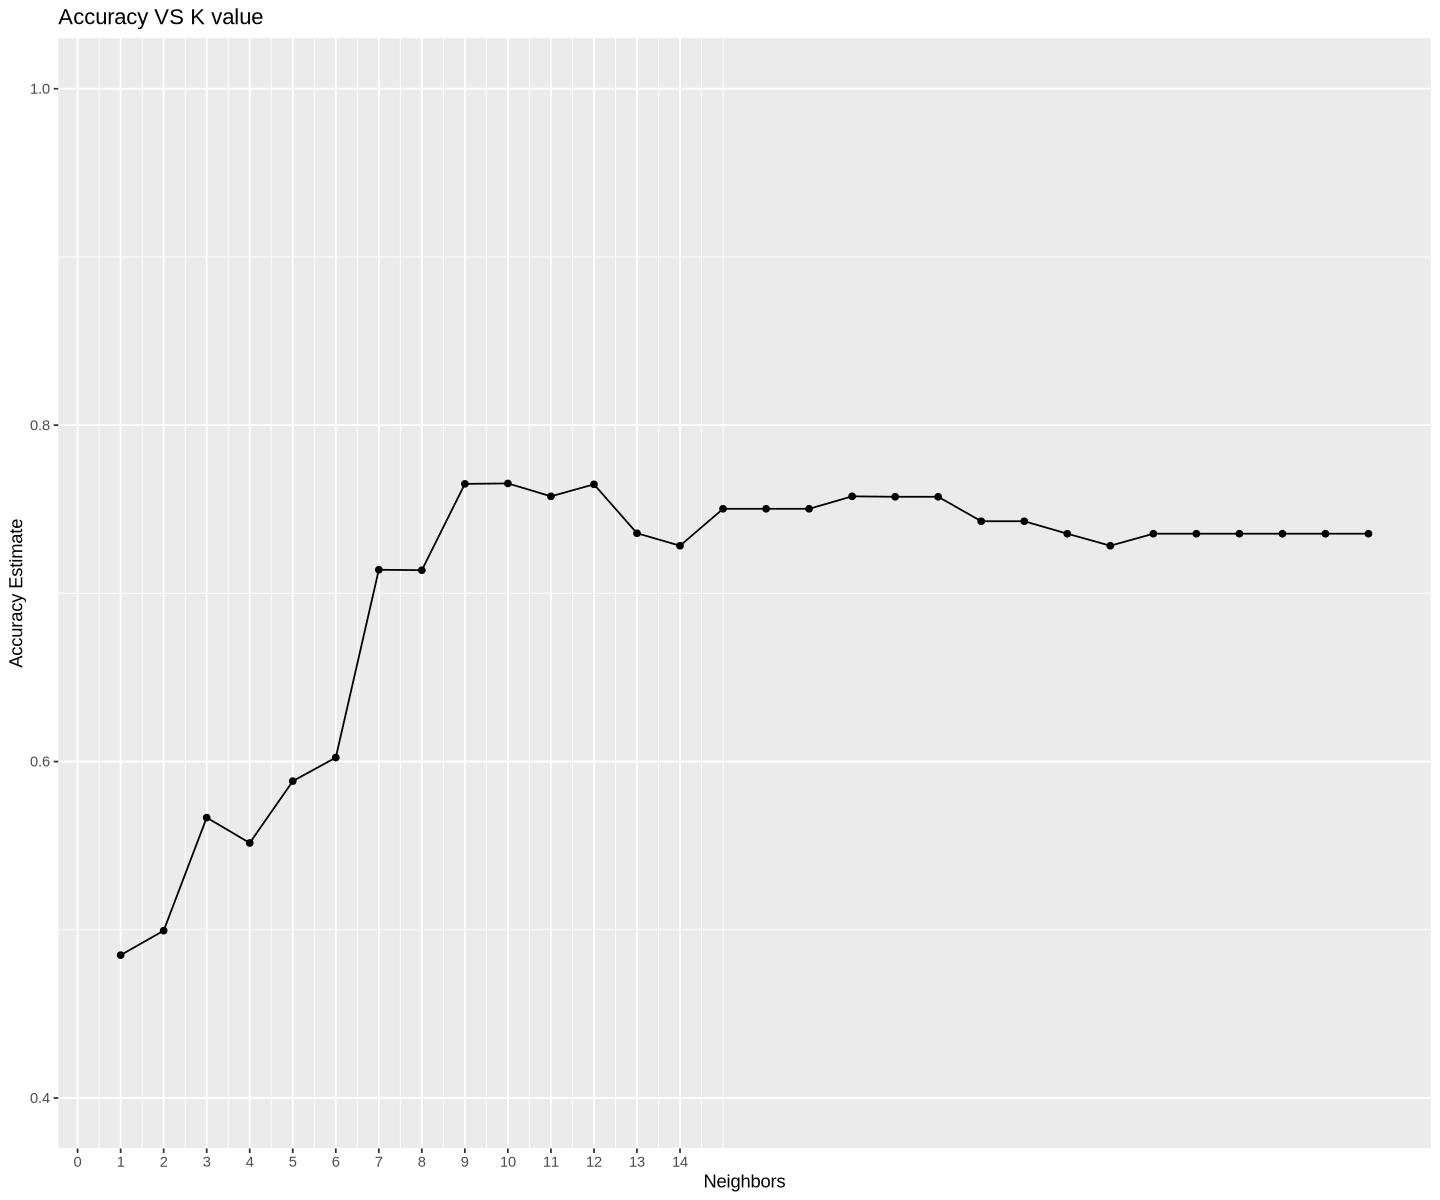

In [131]:
accuracies <- knn_results |> 
      filter(.metric=="accuracy")

options(repr.plot.width=12, repr.plot.height=10)


accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      ggtitle("Accuracy VS K value")+
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

 **Figure 1: Accuracy Vs. K-value plot** \
 The visualization above was created to generate a line plot along with a scatter plot (to determine the data points) that visualizes the accuracy of the KNN classifier with varying values of K. This plot was initially filtered for the performance metric "accuracy". The graph shows that the average accuracy for each K value (number of neighbors) increases from 1 to 9, showing that the accuracy is improving as the K value increases. However, the best accuracy is seen when K is 9 or above, as the accuracy becomes more stable in this range. This indicates that using a value above 9 leads to a better model performance because it not only keeps the important patterns that are recognised in the data, but also reduces the noise. 


## Determing the Best K Value

In [124]:
set.seed(123)

best_k <- knn_results |>
  arrange(desc(mean)) |>  
  slice(1)      
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,accuracy,binary,0.7653439,5,0.02567501,Preprocessor1_Model10


The results shown above demonstrate that the model performs well with neighbors set at 10, which has an accuracy of 76.5%. 



## Testing the Model with the Testing Set

In [132]:
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(new_knn_spec) |>
  fit(data = players_train)

In [133]:
players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)
players_test_predictions

.pred_class,experience,Age,subscribe,experience_numeric
<fct>,<fct>,<dbl>,<fct>,<dbl>
TRUE,Pro,9,TRUE,4
TRUE,Veteran,17,TRUE,5
TRUE,Veteran,17,FALSE,5
⋮,⋮,⋮,⋮,⋮
TRUE,Amateur,17,TRUE,2
TRUE,Beginner,17,TRUE,1
TRUE,Amateur,17,FALSE,2


After determining the best K value (number of neighbors), we can use that value and add it to our workflow. The next step after training the players_train dataset, the model can now make predictions on the test set. Through the table above, it reveals that it is able to correctly identify many subscribers (True Positives). However, there are also several instances where it tends to misidentify many non-subscribers as subscribers (False Positives). This demonstrates that there is a bias towards positive predictions.  


## Performance Metrics

In [127]:
players_metrics <- players_test_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class)

players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.750000
kap,binary,0.137931


By using the metrics() function, it compares the model's prediction, which is labelled as .pred_class, against the true values labelled as subscribe. It computes both the accuracy and Cohen's Kappa, which measures and assesses the agreement of the predicted and actual classes, compared to random chance. The 75% accuracy reveals a decent performance of the classifier; however, the Kappa score of 0.14 demonstrates that there are some flaws in the model. Kappa ranges from -1, which is worse than random guessing, to +1, which is perfect agreement. A positive small decimal value reveals that the model performs slightly better than random guessing.


In [134]:
confusion <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     14   43

The confusion matrix shown above uses the model's prediction and compares those values to the true values. By using the conf_mat() function, the rows represent the model predictions, while the columns represent the actual values. This shows the model performs well when identifying subscribers, where they were able to identify 43 subscribers. However, it has difficulty identifying non-subscribers, as the model identified 14 subscribers when these players are non-subscribers. 




                     


# Discussion

# References
